In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go



### Mi dataset de Kaggle

In [113]:
df_1= pd.read_csv("C:\\Users\\teres\\Desktop\\Bootcamp\\Carpeta_alumno\\carpeta_profesor\\2402_dsft_thebridge\\Entregas\\EDA\\mental_health_kaggle\\EDA\\data\\smmh.csv")


fuente_1 = " social media- mental health,kaggle"

## Hipótesis

* #### Ver qué relación hay entre la cantidad de horas empleadas en el uso de RRSS y el riesgo de sufrir enfermedades mentales
* #### Ver qué relación hay entre la cantidad de horas empleadas en el uso de RRSS y el mal uso de estas ( Preguntas de la 9-17)
* #### Ver qué diferencias hay por género en el uso de RRSS y el riesgo de sufrir enfermedades mentales
* #### Ver qué diferencias hay por grupos de edad en el uso de RRSS y el riesgo de sufrir enfermedades mentales

 ### 1. He formulado mis hipótesis en base a diferentes agrupaciones de datos en mi dataset:
   #### * El riesgo de sufrir enfermedades mentales lo deduzco de las ultimas 3 columnas del dataset que incluyen preguntas sobre sintomatología depresiva.
   #### * El mal uso de redes sociales lo he definido por las preguntas desde la 9 a la 17 del dataset original
    

In [114]:
pd.set_option("display.max_columns", None)

In [115]:
df_1.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [116]:
df_1.tail()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4
480,11/12/2022 13:16:50,53.0,Male,Married,Salaried Worker,Private,Yes,"Facebook, YouTube",Less than an Hour,2,3,1,3,1,1,3,3,2,2,2,3


In [117]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

##### Renombro las columnas en español y agrupo las preguntas según a lo que creo que pueden hacer referencia. Luego van a ser la referencia para sacar resultados en base a sus medias


In [118]:
df_1_esp = df_1.rename(columns = {"1. What is your age?": "Edad",
                       "2. Gender": "Género",
                       "3. Relationship Status": "Estatus relacional",
                       "4. Occupation Status": "Ocupación",
                       "5. What type of organizations are you affiliated with?": "Afiliación",
                       "6. Do you use social media?" : "RS_uso" ,
                       "7. What social media platforms do you commonly use?": "RS_tipo",
                       "8. What is the average time you spend on social media every day?": "RS_tiempo_medio",
                       "9. How often do you find yourself using Social media without a specific purpose?": "TDAH_1",
                       "10. How often do you get distracted by Social media when you are busy doing something?": "TDAH_2",
                       "11. Do you feel restless if you haven't used Social media in a while?": "Ansiedad_1",
                       "12. On a scale of 1 to 5, how easily distracted are you?": "TDAH_3",
                       "13. On a scale of 1 to 5, how much are you bothered by worries?" :"Ansiedad_2",
                       "14. Do you find it difficult to concentrate on things?":"TDAH_4",
                       "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?":"Autoestima_1",
                       "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "Autoestima_2",
                       "17. How often do you look to seek validation from features of social media?": "Autoestima_3",
                       "18. How often do you feel depressed or down?": "Depresion_1",
                       "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "Depresion_2",
                       "20. On a scale of 1 to 5, how often do you face issues regarding sleep?" : "Depresion_3"})



                         

In [119]:
df_1["Timestamp"]

0       4/18/2022 19:18:47
1       4/18/2022 19:19:28
2       4/18/2022 19:25:59
3       4/18/2022 19:29:43
4       4/18/2022 19:33:31
              ...         
476     5/21/2022 23:38:28
477      5/22/2022 0:01:05
478     5/22/2022 10:29:21
479     7/14/2022 19:33:47
480    11/12/2022 13:16:50
Name: Timestamp, Length: 481, dtype: object

In [120]:
### Modifico columna de fecha a formato fecha por si lo necesito

df_1_esp["Timestamp"]=pd.to_datetime(df_1_esp["Timestamp"])
#df['date'] = pd.to_datetime(df['date']) 

In [121]:
df_1_esp = df_1_esp.loc[:, ["Timestamp", "Edad","Género" ,"Estatus relacional","Ocupación" ,"Afiliación" ,"RS_uso" ,"RS_tipo" ,"RS_tiempo_medio" ,"TDAH_1" ,"TDAH_2" ,"TDAH_3" , "TDAH_4", "Ansiedad_1" ,"Ansiedad_2","Autoestima_1" ,"Autoestima_2" ,"Autoestima_3","Depresion_1","Depresion_2","Depresion_3"]]

In [122]:
df_1_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           481 non-null    datetime64[ns]
 1   Edad                481 non-null    float64       
 2   Género              481 non-null    object        
 3   Estatus relacional  481 non-null    object        
 4   Ocupación           481 non-null    object        
 5   Afiliación          451 non-null    object        
 6   RS_uso              481 non-null    object        
 7   RS_tipo             481 non-null    object        
 8   RS_tiempo_medio     481 non-null    object        
 9   TDAH_1              481 non-null    int64         
 10  TDAH_2              481 non-null    int64         
 11  TDAH_3              481 non-null    int64         
 12  TDAH_4              481 non-null    int64         
 13  Ansiedad_1          481 non-null    int64         

In [123]:
### Como hay varias categorias dentro de género quiero agrupar todas las que no son hombre o mujer en Other 

for i,  x in enumerate(df_1_esp["Género"]):
    if (x != "Female") and (x != "Male"):
        df_1_esp.loc[i,"Género"] = "Other"
        
    
df_1_esp["Género"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [124]:
n_hombres=len(df_1_esp[df_1_esp["Género"]=="Male"])
n_mujeres=len(df_1_esp[df_1_esp["Género"]=="Female"])
n_other= len(df_1_esp[df_1_esp["Género"]=="Other"])

print(n_hombres)
print(n_mujeres)
print(n_other)

211
263
7


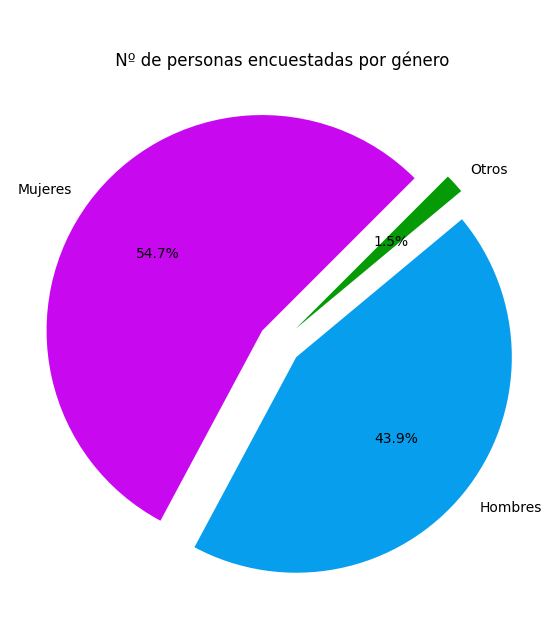

In [125]:
plt.figure(figsize=(8,7))
colors = ["#C808EE", "#089EEE", "#069B06"]
conteo_genero = df_1_esp["Género"].value_counts()
etiquetas = ["Mujeres", "Hombres", "Otros"]

plt.pie(conteo_genero, labels=etiquetas, colors=colors, autopct='%1.1f%%', startangle=45, explode=(0.1, 0.1, 0.1))

plt.title("\n\n Nº de personas encuestadas por género")

plt.show()

In [126]:

colors = ["#C808EE", "#089EEE", "#069B06"]
fig = go.Figure(data=[go.Pie(labels=etiquetas, values=conteo_genero, 
                             marker=dict(colors=colors),
                             textinfo='label+percent',
                             hole=0.3)])

fig.update_layout(title="Nº de personas encuestadas por género", title_x=0.5)
fig.update_layout(width=600, height=600)
fig.show()

In [127]:
df_1_esp[df_1_esp["Género"]== "Other"].head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
35,2022-04-18 20:55:44,21.0,Other,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord",More than 5 hours,3,4,4,5,5,4,1,3,1,4,2,1
67,2022-04-19 00:10:02,18.0,Other,Single,School Student,School,Yes,"Twitter, Instagram, YouTube, Reddit, TikTok",Between 2 and 3 hours,2,1,3,3,2,5,2,3,2,4,2,4
85,2022-04-19 07:10:09,24.0,Other,Single,Salaried Worker,NaN,Yes,"YouTube, Reddit",Between 2 and 3 hours,4,3,3,2,2,5,3,2,2,4,3,1
93,2022-04-19 10:24:04,17.0,Other,Single,School Student,School,Yes,"Twitter, Instagram, YouTube, Snapchat, Discord...",Between 4 and 5 hours,4,4,4,4,3,2,3,2,2,3,3,5
238,2022-04-26 23:02:27,69.0,Other,Divorced,Salaried Worker,NaN,Yes,TikTok,More than 5 hours,5,5,5,5,5,5,5,5,5,5,5,5


In [128]:
## convertir la columna de edad en entero
df_1_esp['Edad'] = df_1_esp['Edad'].astype('int64')


#### Distribución de la muestra por edad y ocupación

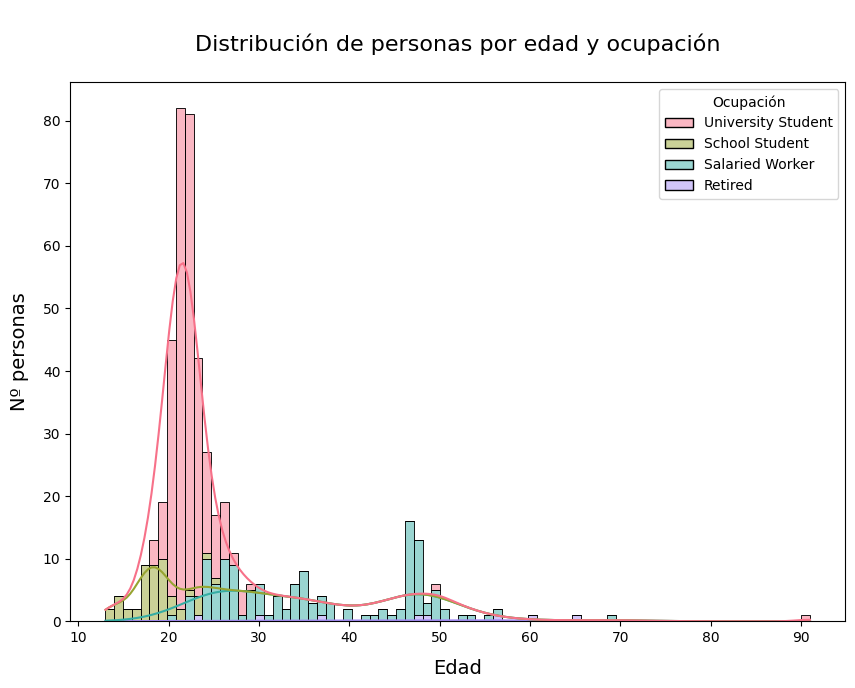

In [129]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df_1_esp, x="Edad", bins=80, hue="Ocupación", multiple="stack", palette="husl",kde=True)
plt.xlabel("Edad", fontsize=14, labelpad=(10.0))
plt.ylabel("Nº personas", fontsize=14,labelpad=(10.0))
plt.title("\nDistribución de personas por edad y ocupación\n", fontsize=16)
plt.show()

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\4173127674.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\teres\AppData\Local\Temp\ipykernel_21248\4173127674.py:7: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.



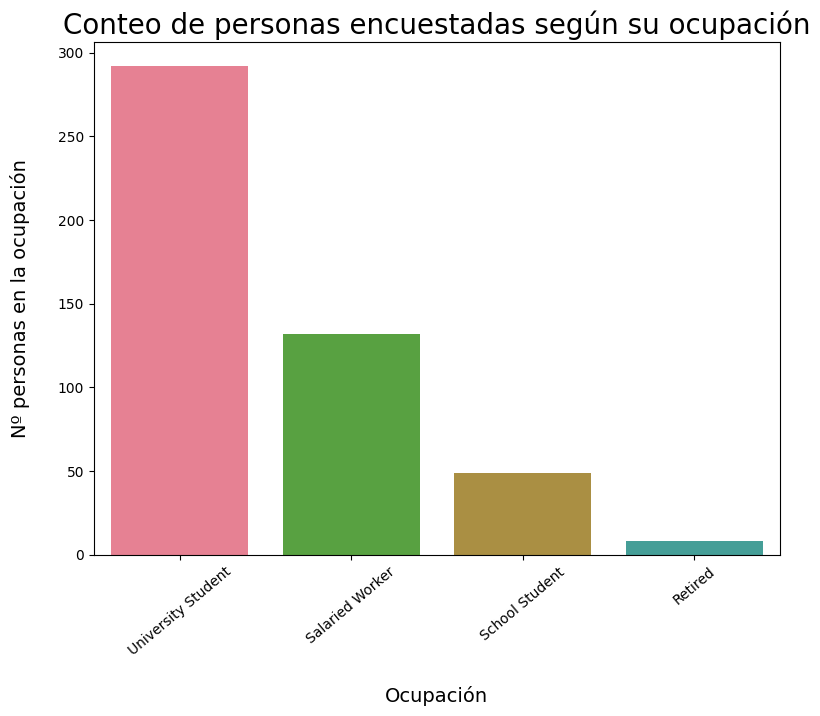

In [130]:
palette = sns.color_palette("husl")
idx_salaried = df_1_esp["Ocupación"].value_counts().index.get_loc("Salaried Worker")
idx_student = df_1_esp["Ocupación"].value_counts().index.get_loc("School Student")
palette[idx_salaried], palette[idx_student] = palette[idx_student], palette[idx_salaried]

plt.figure(figsize=(8, 7))
sns.barplot(x=df_1_esp["Ocupación"].value_counts().index, 
            y=df_1_esp["Ocupación"].value_counts(),
            palette=palette)
plt.title("Conteo de personas encuestadas según su ocupación", fontsize=20, ha='center')
plt.ylabel("Nº personas en la ocupación", labelpad=20, fontsize=14)
plt.xticks(rotation=40)
plt.xlabel("Ocupación", labelpad=20, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [131]:
df_1_esp["Estatus relacional"].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3575291063.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3575291063.py:2: UserWarning:

The palette list has more values (6) than needed (4), which may not be intended.



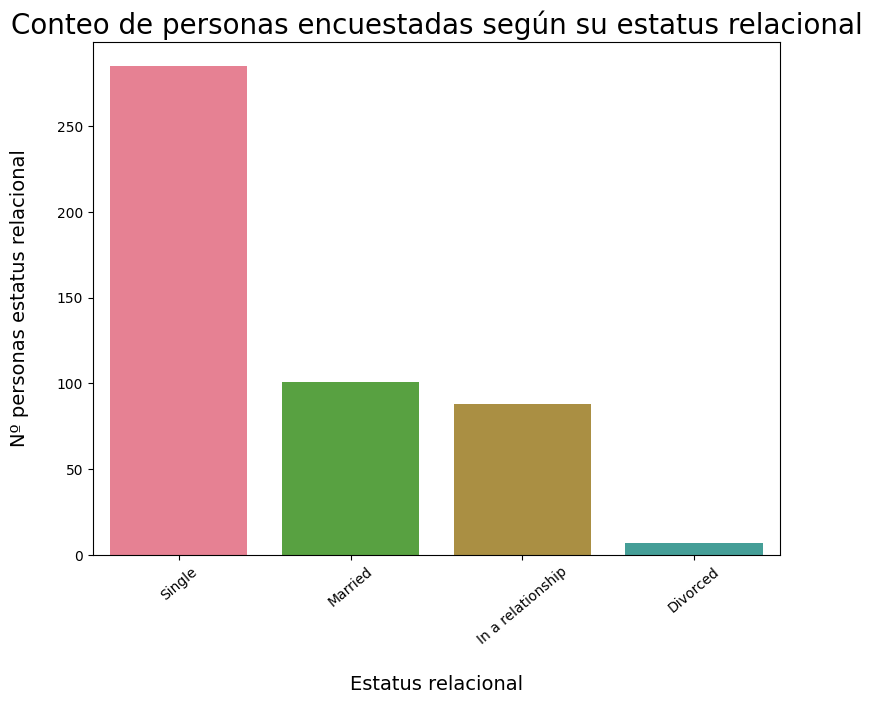

In [132]:
plt.figure(figsize=(8, 7))
sns.barplot(x=df_1_esp["Estatus relacional"].value_counts().index, 
            y=df_1_esp["Estatus relacional"].value_counts(),
            palette=palette)
plt.title("Conteo de personas encuestadas según su estatus relacional", fontsize=20, ha='center')
plt.ylabel("Nº personas estatus relacional", labelpad=20, fontsize=14)
plt.xticks(rotation=40)
plt.xlabel("Estatus relacional", labelpad=20, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show();

In [133]:
df_1_esp["Ocupación"].unique()

array(['University Student', 'School Student', 'Salaried Worker',
       'Retired'], dtype=object)

In [134]:
df_1_esp["Afiliación"].unique() ### no le voy a dar mucha importancia a lo mejor me la cargo luego

array(['University', 'Private', nan, 'School, University', 'Company',
       'School, Private', 'University, Company', 'Goverment',
       'Company, Private', 'School', 'University, Goverment, Private',
       'University, Company, Private', 'University, Private',
       'University, N/A', 'School, University, Private',
       'University, Goverment', 'University, Company, Goverment',
       'School, Company', 'School, N/A'], dtype=object)

#### Compruebo qué pasa con los que dicen que no usan RRSS; vemos que sí que usan pero tiempos bajos

In [135]:
usan_RS = df_1_esp[df_1_esp["RS_uso"]== "Yes"]
len(usan_RS)

478

In [136]:
no_usan_RS = df_1_esp[df_1_esp["RS_uso"]== "No"] 
len(no_usan_RS)

3

In [137]:
no_usan_RS

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
9,2022-04-18 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1
54,2022-04-18 22:35:53,26,Male,In a relationship,Salaried Worker,Company,No,"YouTube, Discord, Reddit",Between 1 and 2 hours,4,1,2,1,1,2,1,3,1,1,3,2
134,2022-04-19 22:04:03,50,Male,Divorced,Salaried Worker,Private,No,"Instagram, YouTube",Between 1 and 2 hours,2,1,2,2,1,2,1,4,1,2,2,1


### Para comparar el tiempo en RS:

In [138]:
df_1_esp["RS_tiempo_medio"].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

In [139]:
df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 4 and 5 hours') |  (df_1_esp["RS_tiempo_medio"] =='More than 5 hours')].corr(numeric_only=True)

,Edad,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
Edad,1.000000,0.154537,0.120811,0.009803,-0.019117,0.113291,0.012938,0.084808,0.192864,0.093485,0.021433,0.040412,0.053898
TDAH_1,0.154537,1.000000,0.240983,0.173917,0.118032,0.194033,0.074710,-0.065285,0.149495,0.041644,0.114929,0.225955,0.221361
TDAH_2,0.120811,0.240983,1.000000,0.555982,0.458798,0.387597,0.209330,0.159438,0.079906,0.164106,0.170658,0.269230,0.218869
TDAH_3,0.009803,0.173917,0.555982,1.000000,0.621966,0.448226,0.309162,0.257322,0.004997,0.186369,0.292137,0.421128,0.198785
TDAH_4,-0.019117,0.118032,0.458798,0.621966,1.000000,0.383426,0.404304,0.273847,0.037218,0.195978,0.392792,0.364371,0.239623
Ansiedad_1,0.113291,0.194033,0.387597,0.448226,0.383426,1.000000,0.244772,0.216027,0.243954,0.127987,0.220441,0.365132,0.019991
Ansiedad_2,0.012938,0.074710,0.209330,0.309162,0.404304,0.244772,1.000000,0.339129,-0.044791,0.238715,0.525644,0.343535,0.218866
Autoestima_1,0.084808,-0.065285,0.159438,0.257322,0.273847,0.216027,0.339129,1.000000,-0.130854,0.516128,0.312797,0.303703,0.153977
Autoestima_2,0.192864,0.149495,0.079906,0.004997,0.037218,0.243954,-0.044791,-0.130854,1.000000,0.143911,-0.062618,0.153853,0.091244
Autoestima_3,0.093485,0.041644,0.164106,0.186369,0.195978,0.127987,0.238715,0.516128,0.143911,1.000000,0.237226,0.254587,0.186898


In [140]:
df_1_esp.corr(numeric_only=True)

,Edad,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
Edad,1.000000,-0.225191,-0.232057,-0.224444,-0.264529,-0.125738,-0.288705,-0.092542,0.018018,-0.039000,-0.303666,-0.241454,-0.161311
TDAH_1,-0.225191,1.000000,0.463353,0.365491,0.288829,0.359031,0.252082,0.148203,0.087645,0.144519,0.315478,0.359379,0.260496
TDAH_2,-0.232057,0.463353,1.000000,0.607419,0.527745,0.513354,0.343307,0.288504,0.078065,0.270144,0.379444,0.389132,0.255362
TDAH_3,-0.224444,0.365491,0.607419,1.000000,0.662768,0.514801,0.462673,0.286120,0.014630,0.172585,0.407667,0.479993,0.291147
TDAH_4,-0.264529,0.288829,0.527745,0.662768,1.000000,0.469440,0.545904,0.371156,0.060742,0.242035,0.509794,0.503196,0.354676
Ansiedad_1,-0.125738,0.359031,0.513354,0.514801,0.469440,1.000000,0.347036,0.320973,0.134191,0.245925,0.328969,0.384770,0.166601
Ansiedad_2,-0.288705,0.252082,0.343307,0.462673,0.545904,0.347036,1.000000,0.414301,0.020589,0.208847,0.588757,0.430348,0.327367
Autoestima_1,-0.092542,0.148203,0.288504,0.286120,0.371156,0.320973,0.414301,1.000000,-0.011468,0.417328,0.417801,0.374242,0.193716
Autoestima_2,0.018018,0.087645,0.078065,0.014630,0.060742,0.134191,0.020589,-0.011468,1.000000,0.153574,0.035470,0.046153,0.068510
Autoestima_3,-0.039000,0.144519,0.270144,0.172585,0.242035,0.245925,0.208847,0.417328,0.153574,1.000000,0.272125,0.278575,0.128898


#### Voy a establecer 3 datasets respecto a la cantidad de horas empleadas en redes sociales:

    * Grupo 1 : df_alto_uso : 4-5-+
    * Grupo 2: df_medio_uso: 2-3
    * Grupo 3: df_bajo_uso: 0-2


In [141]:
df_alto_uso = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 4 and 5 hours') |  (df_1_esp["RS_tiempo_medio"] =='More than 5 hours')]

##### Sumamos los valores de las preguntas de potencial uso nocivo de RRSS, (-  las de depresion) porque luego veremos si estan relacionadas con mayores valores de esas preguntas

In [142]:
### la media de todo el grupo
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).mean()/9

3.384942319368549

In [143]:
## La media por usuario respecto a sus preguntas sobre el potencial uso nocivo que hacen de las RRSS y creamos una columna nueva
df_alto_uso["media_respuestas_uso"] = df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\1866829391.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [144]:
## La media por usuario respecto a sus preguntas(columna19-21) y creamos una columna nueva que evalua la media de riesgo de sufrir problemas mentales relacionados con depresión
df_alto_uso["media_respuestas_riesgo"] = df_alto_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3412114349.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [145]:
df_alto_uso.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,media_respuestas_uso,media_respuestas_riesgo
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5,3.222222,4.666667
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2,2.888889,3.000000
7,2022-04-18 19:36:17,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,3,1,3,1,5,5,1,2.444444,3.666667
8,2022-04-18 19:39:36,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,1,1,3,1,5,5,1,2.222222,3.666667
14,2022-04-18 19:59:08,22,Male,Single,University Student,University,Yes,"Facebook, YouTube, Pinterest",More than 5 hours,5,5,5,5,5,5,5,5,5,5,5,5,5.000000,5.000000


#### Estadisticos de media moda mediana para ver si se encuentran cercanas:

In [146]:
df_alto_uso["media_respuestas_riesgo"].describe()

count    183.000000
mean       3.526412
std        0.935203
min        1.000000
25%        3.000000
50%        3.666667
75%        4.333333
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [147]:
### la media de nuestro grupo de alto uso respecto al riesgo de sufrir problemas mentales relacionados con la depresión
df_alto_uso["media_respuestas_riesgo"].mean()

3.526411657559198

In [148]:
df_alto_uso["media_respuestas_riesgo"].mode()

0    3.666667
Name: media_respuestas_riesgo, dtype: float64

In [149]:
df_alto_uso["media_respuestas_riesgo"].median()

3.6666666666666665

In [150]:
### la media de nuestro grupo de alto uso respecto al uso nocivo de RRSS
df_alto_uso["media_respuestas_uso"].mean()

3.384942319368548

In [151]:
df_alto_uso["media_respuestas_uso"].mode()

0    3.555556
Name: media_respuestas_uso, dtype: float64

In [152]:
df_alto_uso["media_respuestas_uso"].median()

3.4444444444444446

Aquí sólo quiero comprobar el rango máximo que sera esperable de 5 y el minimo de 1 y ver si hay alguna correlacion entre las preguntas en este grupo (es meramente informativo)

In [153]:
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).max()/9

5.0

In [154]:
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).min()/9

1.2222222222222223

<Figure size 800x800 with 0 Axes>

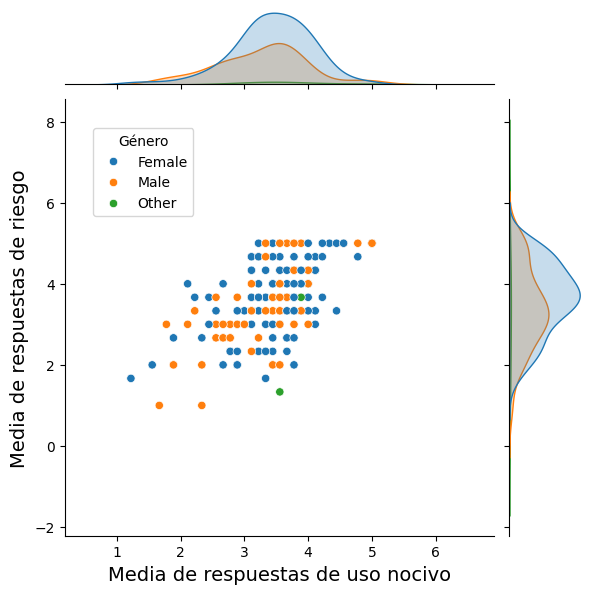

In [155]:
plt.figure(figsize=(8, 8))
joint_plot = sns.jointplot(data=df_alto_uso, x=df_alto_uso["media_respuestas_uso"], y=df_alto_uso["media_respuestas_riesgo"], hue="Género")
joint_plot.set_axis_labels("Media de respuestas de uso nocivo", "Media de respuestas de riesgo", fontsize=14)
#joint_plot.fig.suptitle("Grupo 1: Correlación uso nocivo de RRSS y riesgo de sufrir síntomas depresivos", y=1.05, fontsize=16)
joint_plot.ax_joint.legend(title="Género", loc='upper left', bbox_to_anchor=(0.05, 0.95));
plt.show()

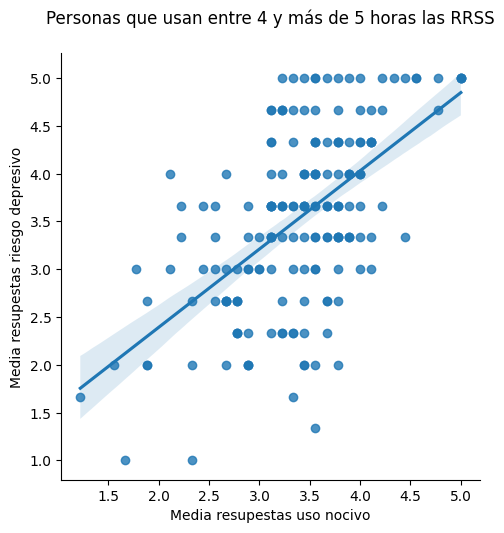

In [156]:
sns.lmplot( data = df_alto_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo" ,fit_reg = True )
plt.title("Personas que usan entre 4 y más de 5 horas las RRSS\n")
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");


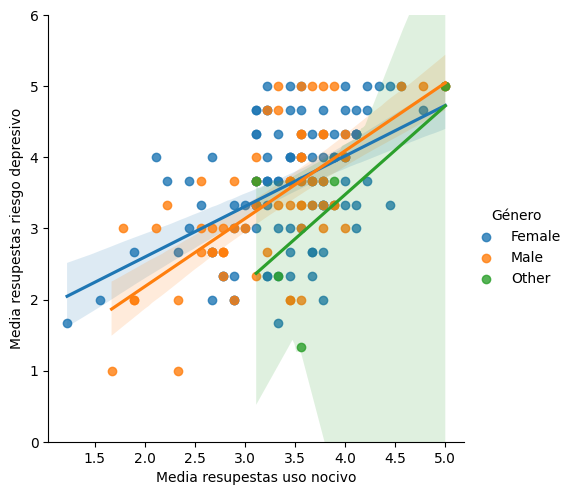

In [157]:
sns.lmplot( data = df_alto_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True,hue= "Género" )
plt.ylim(0,6)
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");


#### 2º grupo el uso medio de RRSS

In [158]:
df_uso_medio = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 2 and 3 hours') |  (df_1_esp["RS_tiempo_medio"] =='Between 3 and 4 hours')]

In [159]:
df_uso_medio.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1
5,2022-04-18 19:33:48,22,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,4,3,3,2,4,4,4,3,3,2,4
6,2022-04-18 19:36:12,21,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,3,2,3,2,4,5,3,4,5,5,3


In [160]:
df_uso_medio["media_respuestas_uso"] = df_uso_medio[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\142126969.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
df_uso_medio["media_respuestas_riesgo"] = df_uso_medio[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\1193776907.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Miramos los estadísticos como con el grupo anterior

In [162]:
df_uso_medio["media_respuestas_riesgo"].describe()

count    194.000000
mean       3.221649
std        0.983813
min        1.000000
25%        2.666667
50%        3.333333
75%        4.000000
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [163]:
df_uso_medio["media_respuestas_riesgo"].mode()

0    3.000000
1    3.666667
Name: media_respuestas_riesgo, dtype: float64

In [164]:
df_uso_medio["media_respuestas_uso"].describe()

count    194.000000
mean       3.119129
std        0.700403
min        1.000000
25%        2.666667
50%        3.222222
75%        3.666667
max        5.000000
Name: media_respuestas_uso, dtype: float64

In [165]:
df_uso_medio["media_respuestas_uso"].mode()

0    2.777778
1    3.222222
Name: media_respuestas_uso, dtype: float64

<Figure size 800x800 with 0 Axes>

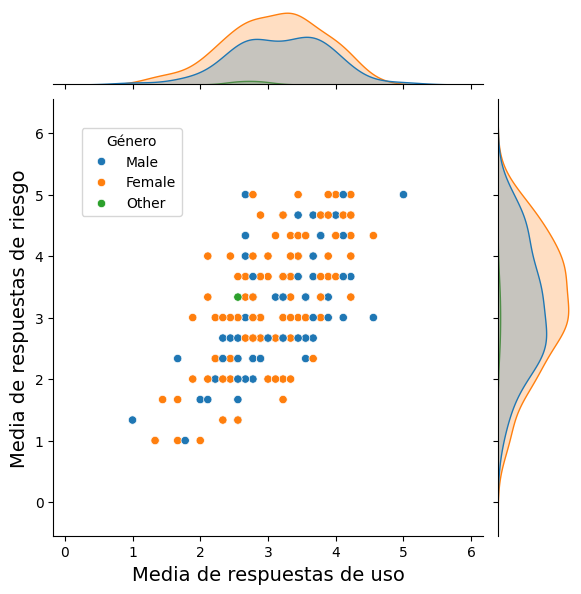

In [166]:
plt.figure(figsize=(8, 8))
joint_plot_1 = sns.jointplot(data=df_uso_medio, x=df_uso_medio["media_respuestas_uso"], y=df_uso_medio["media_respuestas_riesgo"], hue="Género")
joint_plot_1.set_axis_labels("Media de respuestas de uso", "Media de respuestas de riesgo", fontsize=14)
#joint_plot_1.fig.suptitle("Grupo 2: Correlación entre uso nocivo de RRSS y riesgo de sufrir síntomas depresivos", y=1.05, fontsize=16)
joint_plot_1.ax_joint.legend(title="Género", loc='upper left', bbox_to_anchor=(0.05, 0.95))

plt.show();

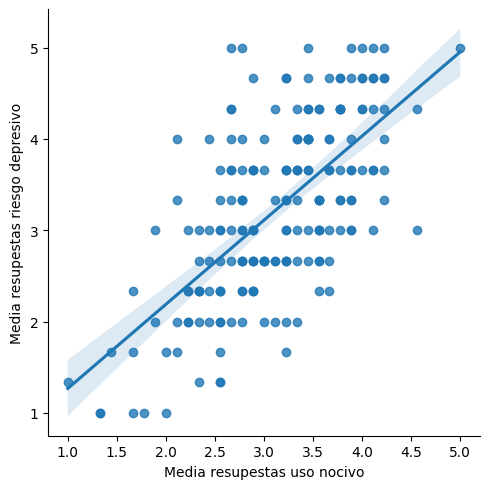

In [167]:
sns.lmplot( data = df_uso_medio, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True )
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");

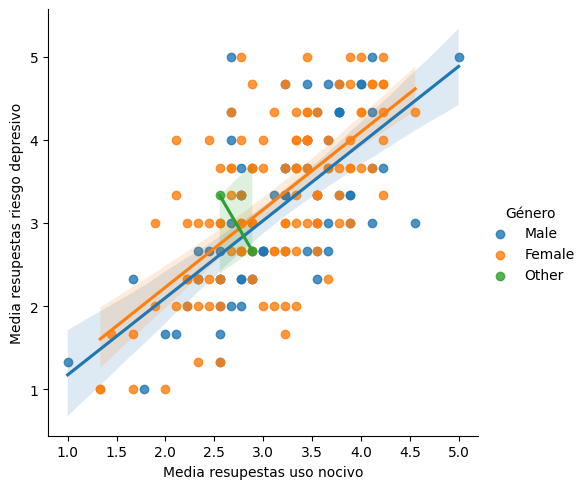

In [168]:
sns.lmplot( data = df_uso_medio, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True ,hue = "Género")
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");




#### 3er Grupo de bajo uso de RRSS

In [169]:
df_bajo_uso = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Less than an Hour') |  (df_1_esp["RS_tiempo_medio"] =='Between 1 and 2 hours')]

In [170]:
df_bajo_uso.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
9,2022-04-18 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1
15,2022-04-18 20:15:31,23,Male,In a relationship,University Student,Private,Yes,"Facebook, Instagram, YouTube, Reddit",Between 1 and 2 hours,3,4,3,4,2,4,3,2,2,3,4,2
16,2022-04-18 20:15:38,21,Male,Single,University Student,University,Yes,"Facebook, YouTube, Discord",Less than an Hour,2,2,2,2,1,4,1,3,1,4,1,3
18,2022-04-18 20:22:02,28,Male,Single,University Student,University,Yes,"Facebook, YouTube, Discord, Reddit",Between 1 and 2 hours,3,4,4,5,2,5,2,3,1,3,3,1
19,2022-04-18 20:28:03,34,Male,Divorced,Salaried Worker,Private,Yes,"Facebook, Twitter, Instagram, YouTube",Between 1 and 2 hours,2,4,3,1,3,4,1,5,3,2,2,2


In [171]:
df_bajo_uso["media_respuestas_uso"] = df_bajo_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3659517817.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
df_bajo_uso["media_respuestas_riesgo"] = df_bajo_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\2193583778.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
df_bajo_uso["media_respuestas_riesgo"].describe()

count    104.000000
mean       2.628205
std        1.065602
min        1.000000
25%        1.916667
50%        2.666667
75%        3.333333
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [174]:
df_bajo_uso["media_respuestas_riesgo"].mode()

0    2.333333
1    2.666667
2    3.000000
Name: media_respuestas_riesgo, dtype: float64

In [175]:
df_bajo_uso["media_respuestas_uso"].describe()

count    104.000000
mean       2.448718
std        0.727686
min        1.000000
25%        1.888889
50%        2.500000
75%        2.888889
max        4.555556
Name: media_respuestas_uso, dtype: float64

In [176]:
df_bajo_uso["media_respuestas_uso"].mode()

0    2.777778
Name: media_respuestas_uso, dtype: float64

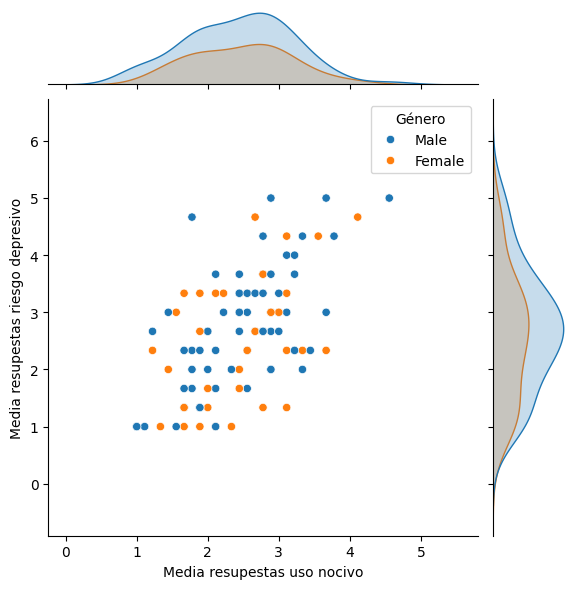

In [177]:
sns.jointplot(data = df_bajo_uso, x = df_bajo_uso["media_respuestas_uso"], y =df_bajo_uso["media_respuestas_riesgo"], hue = "Género")
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");

<Figure size 800x800 with 0 Axes>

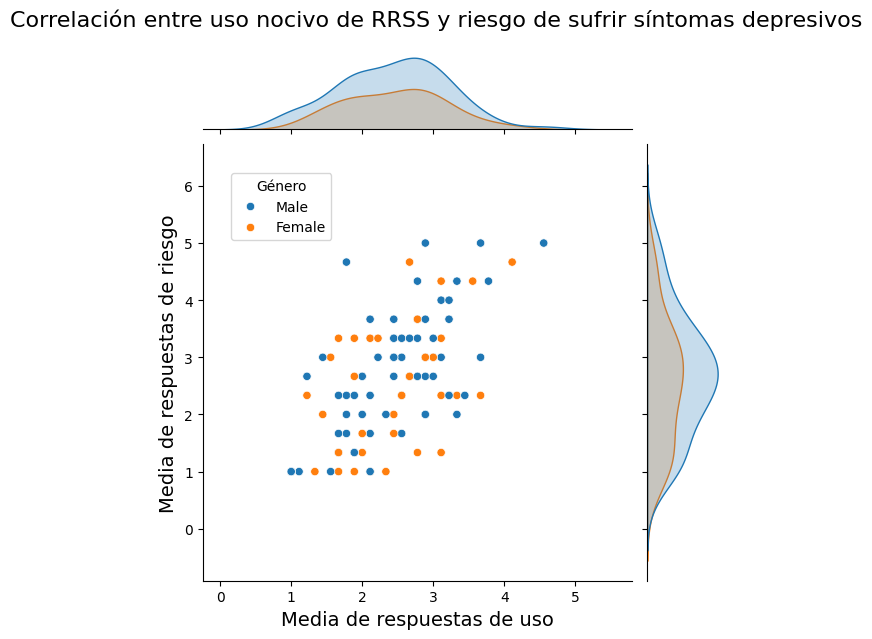

In [178]:
plt.figure(figsize=(8, 8))
joint_plot_1 = sns.jointplot(data=df_bajo_uso, x=df_bajo_uso["media_respuestas_uso"], y=df_bajo_uso["media_respuestas_riesgo"], hue="Género")
joint_plot_1.set_axis_labels("Media de respuestas de uso", "Media de respuestas de riesgo", fontsize=14)
joint_plot_1.fig.suptitle("Correlación entre uso nocivo de RRSS y riesgo de sufrir síntomas depresivos", y=1.05, fontsize=16)
joint_plot_1.ax_joint.legend(title="Género", loc='upper left', bbox_to_anchor=(0.05, 0.95));

plt.show();

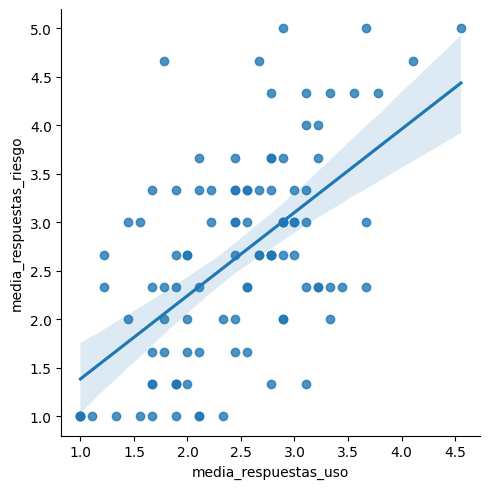

In [179]:
sns.lmplot( data = df_bajo_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True )

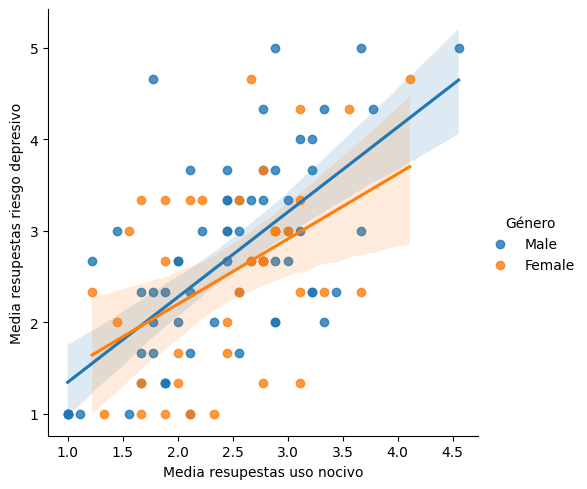

In [180]:
sns.lmplot( data = df_bajo_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True, hue = "Género" )
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");

### Usos de RRSS por género


In [181]:
print(n_mujeres)
print(n_hombres)
print(n_other)

263
211
7


In [182]:

muj_alto_uso_porcentaje=len(df_alto_uso[df_alto_uso["Género"]== "Female"])/n_mujeres
print(muj_alto_uso_porcentaje)
hom_alto_uso_porcentaje= len(df_alto_uso[df_alto_uso["Género"]=="Male"])/n_hombres
print(hom_alto_uso_porcentaje)
oth_alto_uso_porcentaje=len(df_alto_uso[df_alto_uso["Género"]== "Other"])/n_other
print(oth_alto_uso_porcentaje)

0.4220532319391635
0.3175355450236967
0.7142857142857143


In [183]:
muj_uso_medio_porcentaje=len(df_uso_medio[df_uso_medio["Género"]== "Female"])/n_mujeres
print(muj_uso_medio_porcentaje)
hom_uso_medio_porcentaje=len(df_uso_medio[df_uso_medio["Género"]== "Male"])/n_hombres
print(hom_uso_medio_porcentaje)
oth_uso_medio_porcentaje=len(df_uso_medio[df_uso_medio["Género"]== "Other"])/n_other
print(oth_uso_medio_porcentaje)

0.4372623574144487
0.36492890995260663
0.2857142857142857


In [184]:
muj_bajo_uso_porcentaje = (len(df_bajo_uso[df_bajo_uso["Género"]== "Female"])/n_mujeres)
print(muj_bajo_uso_porcentaje )
hom_bajo_uso_porcentaje = len(df_bajo_uso[df_bajo_uso["Género"]== "Male"])/n_hombres
print(hom_bajo_uso_porcentaje)
oth_bajo_uso_porcentaje = len(df_bajo_uso[df_bajo_uso["Género"]== "Other"])/n_other
print(oth_bajo_uso_porcentaje)

0.14068441064638784
0.3175355450236967
0.0


In [185]:
porcentajes_uso= {"%_uso_alto" : [ muj_alto_uso_porcentaje, hom_alto_uso_porcentaje, oth_alto_uso_porcentaje ],
                 "%_uso_medio": [ muj_uso_medio_porcentaje, hom_uso_medio_porcentaje, oth_uso_medio_porcentaje ],
                 "%_uso_bajo": [ muj_bajo_uso_porcentaje, hom_bajo_uso_porcentaje, oth_bajo_uso_porcentaje ]}
indices= ["Mujeres","Hombres","Otros"]
columnas= ["%_uso_alto","%_uso_medio","%_uso_bajo"]

porcentajes_uso_genero= pd.DataFrame ( data = porcentajes_uso, index = indices, columns = columnas )
porcentajes_uso_genero



,%_uso_alto,%_uso_medio,%_uso_bajo
Mujeres,0.422053,0.437262,0.140684
Hombres,0.317536,0.364929,0.317536
Otros,0.714286,0.285714,0.000000


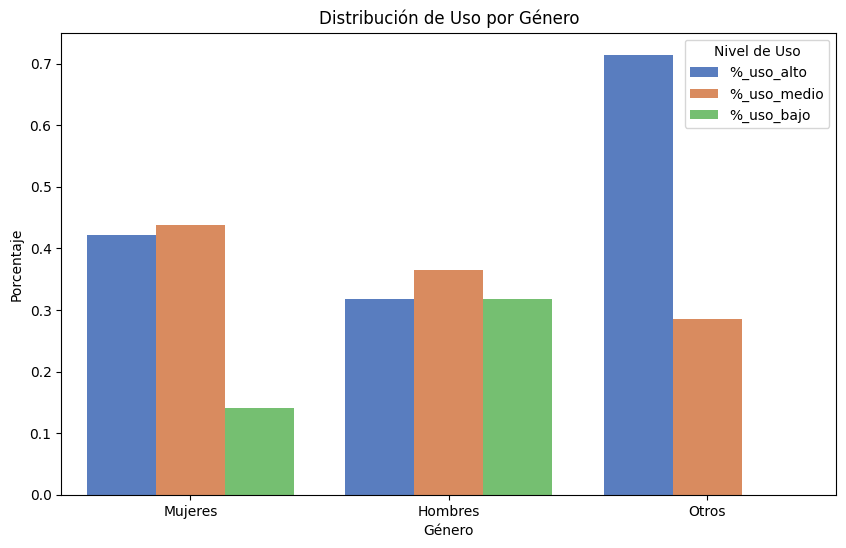

In [186]:
porcentajes_uso_genero_melted = porcentajes_uso_genero.reset_index().melt(id_vars="index", var_name="Nivel de Uso", value_name="Porcentaje")
porcentajes_uso_genero_melted.columns = ["Género", "Nivel de Uso", "Porcentaje"]
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentajes_uso_genero_melted, x="Género", y="Porcentaje", hue="Nivel de Uso", palette="muted")
plt.title("Distribución de Uso por Género")
plt.ylabel("Porcentaje")
plt.xlabel("Género")
plt.legend(title="Nivel de Uso")
plt.show()

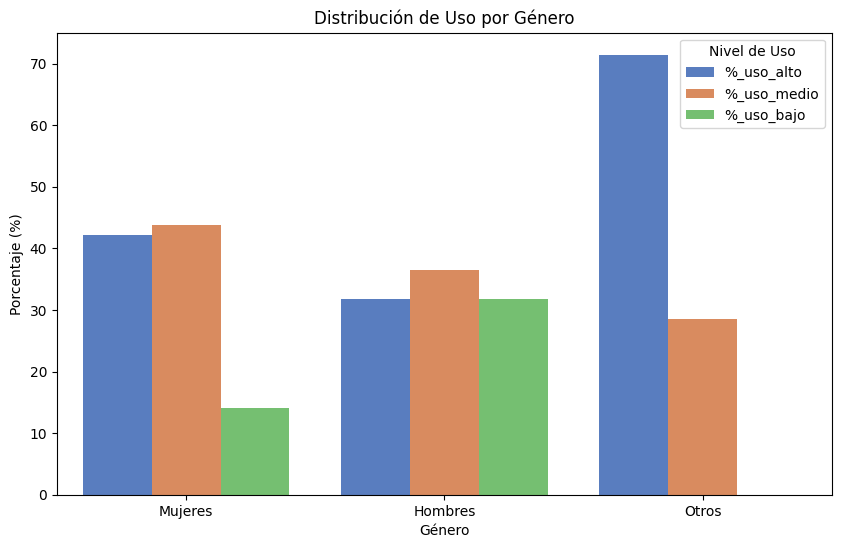

In [187]:

porcentajes_uso_genero_melted["Porcentaje"] *= 100  
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentajes_uso_genero_melted, x="Género", y="Porcentaje", hue="Nivel de Uso", palette="muted")
plt.title("Distribución de Uso por Género")
plt.ylabel("Porcentaje (%)")  
plt.xlabel("Género")
plt.legend(title="Nivel de Uso")
plt.show()

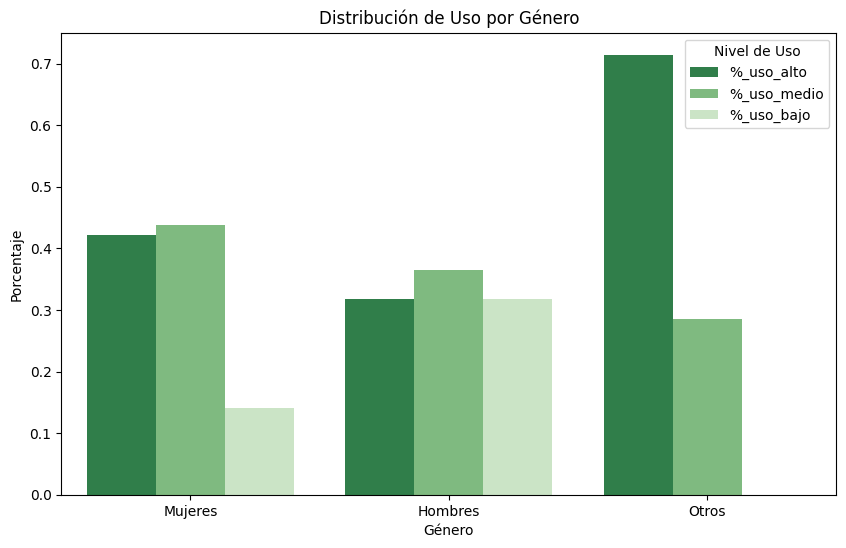

In [188]:
porcentajes_uso_genero_melted = porcentajes_uso_genero.reset_index().melt(id_vars="index", var_name="Nivel de Uso", value_name="Porcentaje")
porcentajes_uso_genero_melted.columns = ["Género", "Nivel de Uso", "Porcentaje"]
num_barras = len(porcentajes_uso_genero_melted["Género"].unique())
azul_degradado = sns.color_palette("Greens_r", n_colors=num_barras)

plt.figure(figsize=(10, 6))
sns.barplot(data=porcentajes_uso_genero_melted, x="Género", y="Porcentaje", hue="Nivel de Uso", palette=azul_degradado)
plt.title("Distribución de Uso por Género")
plt.ylabel("Porcentaje")
plt.xlabel("Género")
plt.legend(title="Nivel de Uso")
plt.show()

#### Me creo una nueva columna de grupos de edad en la que voy a desglosar más los grupos de los jóvenes porque la muestra se concentra sobre todo entre un rango de edades entre 20 y 30 años, y por si hubiera alguna variación

In [189]:


df_1_esp["Grupos_edad"] = 0

df_1_esp.loc[df_1_esp["Edad"]<= 18, "Grupos_edad"] = "menores 18 años"

df_1_esp.loc[(df_1_esp["Edad"]> 18) & (df_1_esp["Edad"]<= 25), "Grupos_edad"] = "Jóvenes de 19-25"

df_1_esp.loc[(df_1_esp["Edad"]> 25) & (df_1_esp["Edad"]<= 35), "Grupos_edad"] = "Jóvenes de 26-35"

df_1_esp.loc[(df_1_esp["Edad"]> 35) & (df_1_esp["Edad"]<= 50), "Grupos_edad"] = "Adultos de 36-50"

df_1_esp.loc[(df_1_esp["Edad"]> 50), "Grupos_edad"] = "Adultos > 50"





C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3665684636.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'menores 18 años' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [190]:
df_1_esp["Grupos_edad"].unique()

array(['Jóvenes de 19-25', 'Jóvenes de 26-35', 'menores 18 años',
       'Adultos > 50', 'Adultos de 36-50'], dtype=object)

Sobre el df original

##### Voy a crear una columna nueva sobre el dataframe original de tiempos de uso como variable categórica, porque me va a ser más fácil operar con toda la tabla, es lo que tenia que haber hecho al principio
##### Añado las columnas de media de resupuestas uso y media de respuestas de riesgo

In [191]:
df_1_esp["Tiempo_uso_num"]=0

In [192]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Less than an Hour") | (df_1_esp["RS_tiempo_medio"]== "Between 1 and 2 hours"),"Tiempo_uso_num"] = "0-2h"

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3513507500.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0-2h' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [193]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Between 2 and 3 hours") | (df_1_esp["RS_tiempo_medio"]== "Between 3 and 4 hours"),"Tiempo_uso_num"] = "2-4h"

In [194]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Between 4 and 5 hours") | (df_1_esp["RS_tiempo_medio"]== "More than 5 hours"),"Tiempo_uso_num"] = "4+h"

In [195]:
df_1_esp["media_respuestas_uso"] = df_1_esp[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

In [196]:
df_1_esp["media_respuestas_riesgo"] = df_1_esp[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

##### Máscaras para definir lo que es una actitud nociva baja, media o alta para poder sacar los gráficos  que relacionan la intensidad de uso de RRSS con el uso nocivo de estas y con el mayor riesgo a tener síntomas depresivos

* baja=rango entre (1-2.33) en la media de respuestas uso
* media=rango entre (2.34-3.67) en la media de respuestas uso
* alta=rango entre (3.67-5) en la media de respuestas uso

   

In [197]:
mascara_actitud_ansiosa_baja_1= df_1_esp[df_1_esp["media_respuestas_uso"]<=2.33]

mascara_actitud_ansiosa_media_1 = df_1_esp[(df_1_esp["media_respuestas_uso"] > 2.33) & (df_1_esp["media_respuestas_uso"] <= 3.67)]

mascara_actitud_ansiosa_alta_1 = df_1_esp[df_1_esp["media_respuestas_uso"] > 3.67]

In [198]:
df_1_esp.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,Grupos_edad,Tiempo_uso_num,media_respuestas_uso,media_respuestas_riesgo
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5,Jóvenes de 19-25,2-4h,3.222222,4.666667
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5,Jóvenes de 19-25,4+h,3.222222,4.666667
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5,Jóvenes de 19-25,2-4h,2.666667,3.666667
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2,Jóvenes de 19-25,4+h,2.888889,3.000000
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1,Jóvenes de 19-25,2-4h,3.888889,3.000000


In [199]:

colores = {'Uso nocivo bajo': 'green', 'Uso nocivo medio': 'orange', 'Uso nocivo alto': 'red'}

df = pd.concat([mascara_actitud_ansiosa_baja_1.assign(actitud='Uso nocivo bajo'),
                mascara_actitud_ansiosa_media_1.assign(actitud='Uso nocivo medio'),
                mascara_actitud_ansiosa_alta_1.assign(actitud='Uso nocivo alto')])

df_count = df.groupby(['Tiempo_uso_num', 'actitud']).size().unstack().reset_index()

df_count = df_count[['Tiempo_uso_num', 'Uso nocivo alto', 'Uso nocivo medio', 'Uso nocivo bajo']]

fig = go.Figure()

for col in df_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_count['Tiempo_uso_num'], y=df_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title = 'Actitud potencialmente nociva en el uso de RRSS por intensidad de uso de RRSS (horas) ',
                  title_x = 0.5,
                  title_font = dict(size=24),
                  xaxis_title = 'Tiempo de uso',
                  yaxis_title = 'Número de personas',
                  font = dict(size=18))

fig.show()

In [200]:
mascara_riesgo_baja_1= df_1_esp[df_1_esp["media_respuestas_riesgo"]<=2.33]

mascara_riesgo_media_1 = df_1_esp[(df_1_esp["media_respuestas_riesgo"] > 2.33) & (df_1_esp["media_respuestas_riesgo"] <= 3.67)]

mascara_riesgo_alta_1 = df_1_esp[df_1_esp["media_respuestas_riesgo"] > 3.67]



In [201]:

df_riesgo = pd.concat([mascara_riesgo_baja_1.assign(riesgo='Riesgo bajo'),
                       mascara_riesgo_media_1.assign(riesgo='Riesgo medio'),
                       mascara_riesgo_alta_1.assign(riesgo='Riesgo alto')])

df_riesgo_count = df_riesgo.groupby(['Tiempo_uso_num', 'riesgo']).size().unstack().reset_index()

df_riesgo_count = df_riesgo_count[['Tiempo_uso_num', 'Riesgo alto', 'Riesgo medio', 'Riesgo bajo']]

fig = go.Figure()

colores = {'Riesgo bajo': 'green', 'Riesgo medio': 'orange', 'Riesgo alto': 'red'}

for col in df_riesgo_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_riesgo_count['Tiempo_uso_num'], y=df_riesgo_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title='Personas con riesgo de experimentar algún síntoma depresivo por nº de horas en RRSS',
                  title_x=0.5,
                  title_font=dict(size=24),
                  xaxis_title='Tiempo de uso',
                  yaxis_title='Número de personas',
                  font=dict(size=18))

fig.show()

#### Diferencias por género:
#### Aqui podemos ver la relación entre el género y el uso de RRSS, antes ya hemos visto como correlaban las variables de media de respuestas de uso nocivo y media de respuestas de riesgo para cada grupo segun la intensidad de uso

In [202]:

colores4 = {'Uso nocivo bajo': 'green', 'Uso nocivo medio': 'orange', 'Uso nocivo alto': 'red'}

df = pd.concat([mascara_actitud_ansiosa_baja_1.assign(actitud='Uso nocivo bajo'),
                mascara_actitud_ansiosa_media_1.assign(actitud='Uso nocivo medio'),
                mascara_actitud_ansiosa_alta_1.assign(actitud= 'Uso nocivo alto')])

df_count = df.groupby(['Género', 'actitud']).size().unstack().reset_index()

df_count = df_count[['Género', 'Uso nocivo alto', 'Uso nocivo medio', 'Uso nocivo bajo']]

fig = go.Figure()

for col in df_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_count['Género'], y=df_count[col], name=col, marker_color=colores4[col]))

fig.update_layout(title='Actitud potencialmente nociva en el uso de RRSS por género ',
                  title_x=0.5,
                  title_font=dict(size=24),
                  xaxis_title='Género',
                  yaxis_title='Número de personas',
                  font=dict(size=18))
                    

fig.update_xaxes(tickfont=dict(size=16))
                  

fig.show()

In [203]:
df_riesgo = pd.concat([mascara_riesgo_baja_1.assign(riesgo='Riesgo bajo'),
                       mascara_riesgo_media_1.assign(riesgo='Riesgo medio'),
                       mascara_riesgo_alta_1.assign(riesgo='Riesgo alto')])

df_riesgo_count = df_riesgo.groupby(['Género', 'riesgo']).size().unstack().reset_index()

df_riesgo_count = df_riesgo_count[['Género', 'Riesgo alto', 'Riesgo medio', 'Riesgo bajo']]

fig = go.Figure()

colores = {'Riesgo bajo': 'green', 'Riesgo medio': 'orange', 'Riesgo alto': 'red'}

for col in df_riesgo_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_riesgo_count['Género'], y=df_riesgo_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title='Personas con riesgo de experimentar algún síntoma depresivo por género',
                  title_x=0.5,
                  title_font=dict(size=24),
                  xaxis_title='Género',
                  yaxis_title='Número de personas',
                  font=dict(size=18))

fig.show()

In [204]:
df_1_esp.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,Grupos_edad,Tiempo_uso_num,media_respuestas_uso,media_respuestas_riesgo
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5,Jóvenes de 19-25,2-4h,3.222222,4.666667
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5,Jóvenes de 19-25,4+h,3.222222,4.666667
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5,Jóvenes de 19-25,2-4h,2.666667,3.666667
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2,Jóvenes de 19-25,4+h,2.888889,3.000000
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1,Jóvenes de 19-25,2-4h,3.888889,3.000000


#### Hago unos gráficos para ver las diferencias por grupos de edad en el uso de RRSS aun que se que la muestra no es muy representativa en cuanto a las diferentes edades por lo que no creo que saque conclusiones muy válidas

In [205]:
orden_grupos_edad = [
    'menores 18 años',
    'Jóvenes de 19-25',
    'Jóvenes de 26-35',
    'Adultos de 36-50',
    'Adultos > 50']

<Figure size 1000x600 with 0 Axes>

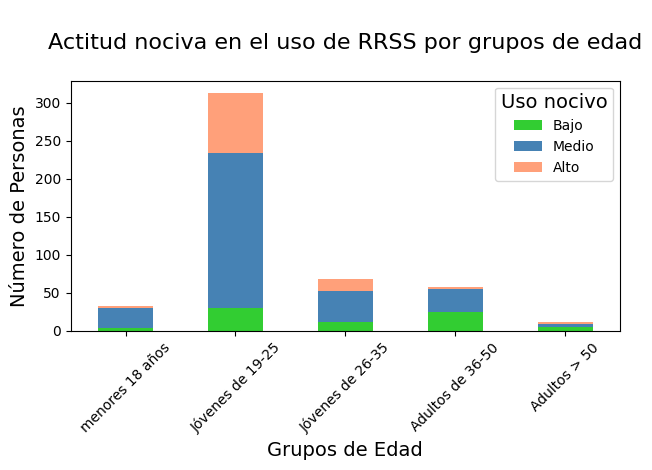

In [206]:

baja_counts = mascara_actitud_ansiosa_baja_1["Grupos_edad"].value_counts().sort_index()
media_counts = mascara_actitud_ansiosa_media_1["Grupos_edad"].value_counts().sort_index()
alta_counts = mascara_actitud_ansiosa_alta_1["Grupos_edad"].value_counts().sort_index()

df_counts = pd.DataFrame({"Bajo": baja_counts, "Medio": media_counts, "Alto": alta_counts})

# Ordenar los índices (grupos de edad) para asegurar un orden correcto en el gráfico
df_counts = df_counts.reindex(["menores 18 años", "Jóvenes de 19-25", "Jóvenes de 26-35", "Adultos de 36-50", "Adultos > 50"])

plt.figure(figsize=(10, 6))
df_counts.plot(kind="bar", stacked=True, color=["#32CD32", "#4682B4", "#FFA07A"])
plt.title("\nActitud nociva en el uso de RRSS por grupos de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14)
plt.ylabel("Número de Personas", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Uso nocivo", title_fontsize="14")
plt.tight_layout()
plt.show();

<Figure size 1000x600 with 0 Axes>

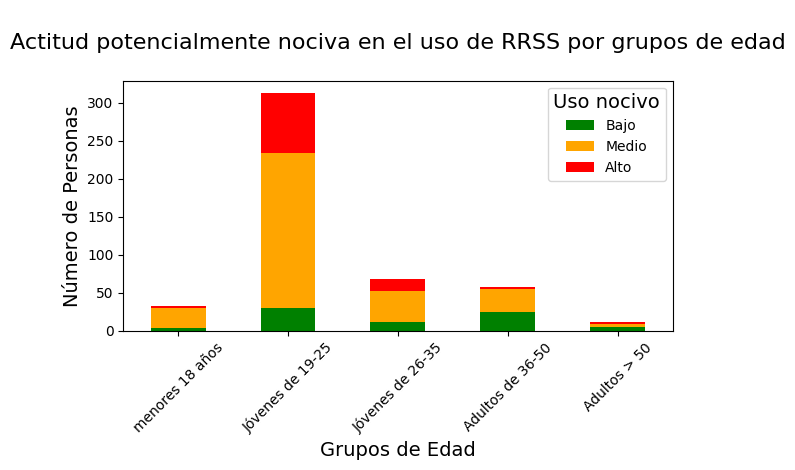

In [207]:
colores = {'Bajo': 'green', 'Medio': 'orange', 'Alto': 'red'}

# Crear la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras apiladas
df_counts.plot(kind="bar", stacked=True, color=[colores["Bajo"], colores["Medio"], colores["Alto"]])

# Establecer el título y etiquetas de los ejes
plt.title("\nActitud potencialmente nociva en el uso de RRSS por grupos de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14)
plt.ylabel("Número de Personas", fontsize=14)
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title="Uso nocivo", title_fontsize="14")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

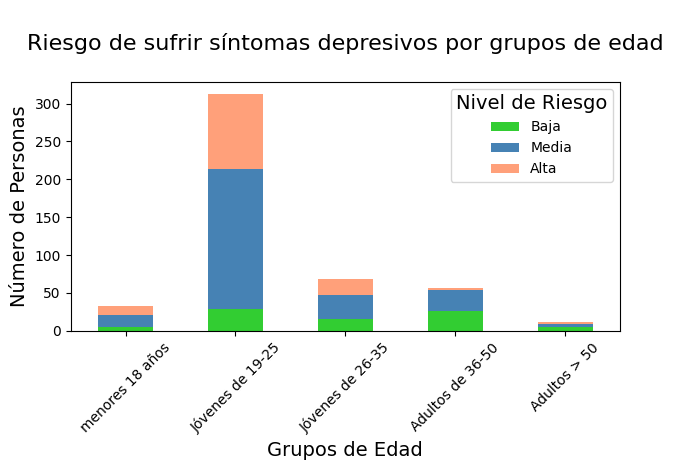

In [208]:
colores = {'Bajo': 'green', 'Medio': 'orange', 'Alto': 'red'}

r_baja_counts = mascara_riesgo_baja_1["Grupos_edad"].value_counts().sort_index()
r_media_counts = mascara_riesgo_media_1["Grupos_edad"].value_counts().sort_index()
r_alta_counts = mascara_riesgo_alta_1["Grupos_edad"].value_counts().sort_index()

df_counts = pd.DataFrame({"Baja": r_baja_counts, "Media": r_media_counts, "Alta": r_alta_counts})
df_counts = df_counts.reindex(["menores 18 años", "Jóvenes de 19-25", "Jóvenes de 26-35", "Adultos de 36-50", "Adultos > 50"])

plt.figure(figsize=(10, 6))
df_counts.plot(kind="bar", stacked=True, color=["#32CD32", "#4682B4", "#FFA07A"])  ###["#FFA07A", "#4682B4", "#32CD32"]
plt.title("\nRiesgo de sufrir síntomas depresivos por grupos de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14)
plt.ylabel("Número de Personas", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Nivel de Riesgo", title_fontsize="14")
plt.tight_layout()
plt.show();

<Figure size 1000x600 with 0 Axes>

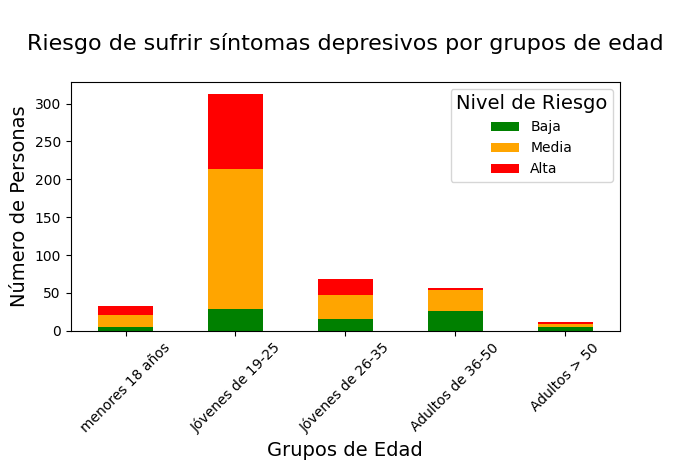

In [209]:
# Definir los colores para cada nivel de riesgo
colores = {'Bajo': 'green', 'Medio': 'orange', 'Alto': 'red'}

plt.figure(figsize=(10, 6))

df_counts.plot(kind="bar", stacked=True, color=[colores["Bajo"], colores["Medio"], colores["Alto"]])

plt.title("\nRiesgo de sufrir síntomas depresivos por grupos de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14)
plt.ylabel("Número de Personas", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Nivel de Riesgo", title_fontsize="14")
plt.tight_layout()
plt.show()

In [210]:
print(df_count.columns)

Index(['Género', 'Uso nocivo alto', 'Uso nocivo medio', 'Uso nocivo bajo'], dtype='object', name='actitud')


#### Algunos gráficos descriptivos extra que puede que incluya en la presentación

In [211]:
df_1_esp["Ocupación"].unique()

array(['University Student', 'School Student', 'Salaried Worker',
       'Retired'], dtype=object)

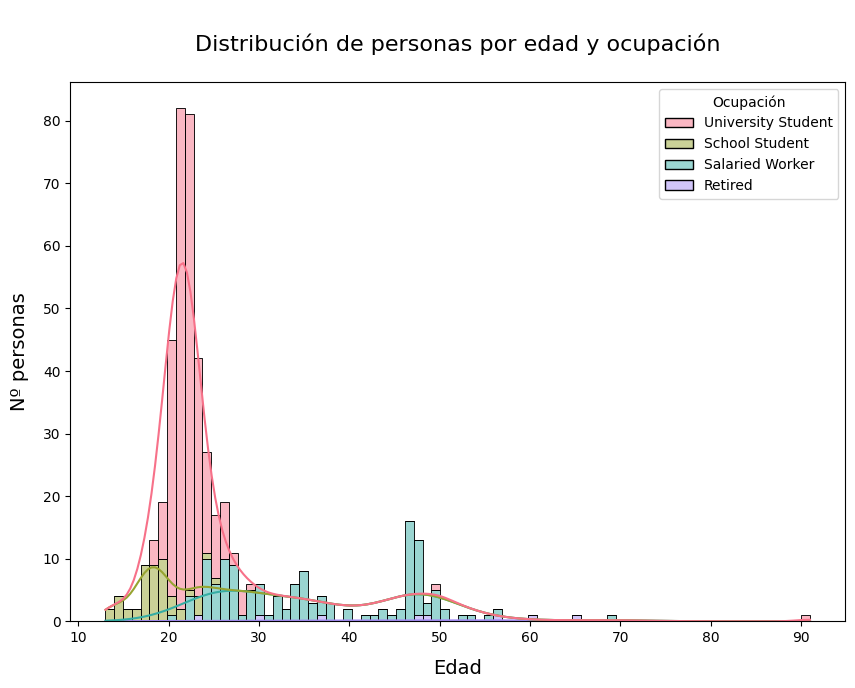

In [212]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df_1_esp, x="Edad", bins=80, hue="Ocupación", multiple="stack", palette="husl",kde=True)
plt.xlabel("Edad", fontsize=14, labelpad=(10.0))
plt.ylabel("Nº personas", fontsize=14,labelpad=(10.0))
plt.title("\nDistribución de personas por edad y ocupación\n", fontsize=16)
plt.show()

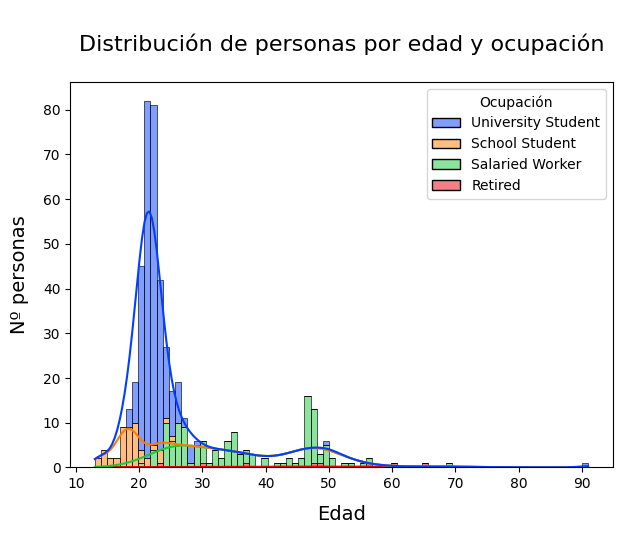

In [213]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_1_esp, x="Edad", bins=80, hue="Ocupación", multiple="stack", palette="bright", kde=True)
plt.xlabel("Edad", fontsize=14, labelpad=(10.0))
plt.ylabel("Nº personas", fontsize=14,labelpad=(10.0))
plt.title("\nDistribución de personas por edad y ocupación\n", fontsize=16)
plt.show()

C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3743932786.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\teres\AppData\Local\Temp\ipykernel_21248\3743932786.py:9: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



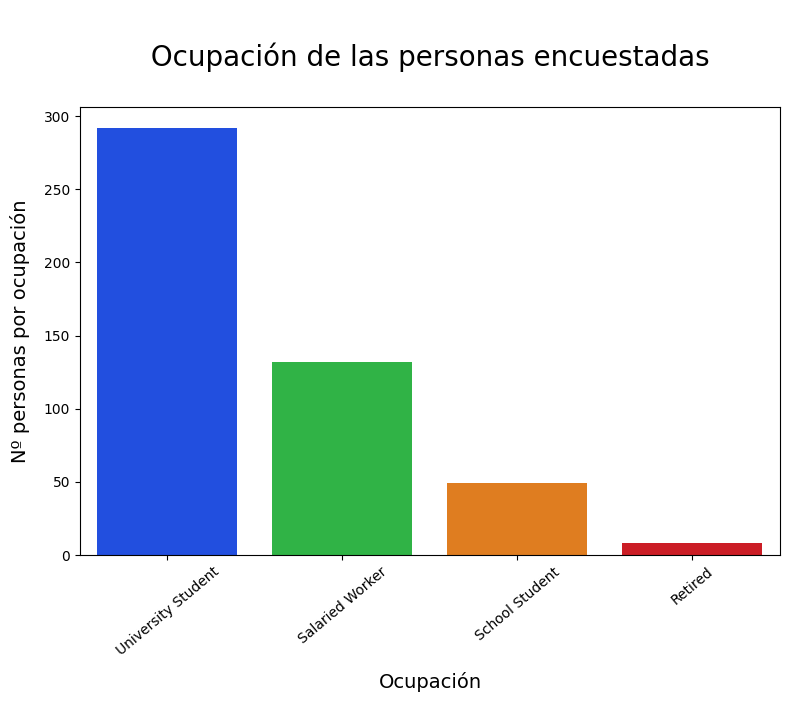

In [214]:
palette = sns.color_palette("bright")

idx_salaried = df_1_esp["Ocupación"].value_counts().index.get_loc("Salaried Worker")
idx_student = df_1_esp["Ocupación"].value_counts().index.get_loc("School Student")

palette[idx_salaried], palette[idx_student] = palette[idx_student], palette[idx_salaried]

plt.figure(figsize=(8, 7))
sns.barplot(x=df_1_esp["Ocupación"].value_counts().index, 
            y=df_1_esp["Ocupación"].value_counts(),
            palette=palette)

plt.title("\n Ocupación de las personas encuestadas \n", fontsize=20, ha='center')
plt.ylabel("Nº personas por ocupación", labelpad=10, fontsize=14)
plt.xticks(rotation=40)
plt.xlabel("Ocupación", labelpad=10, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

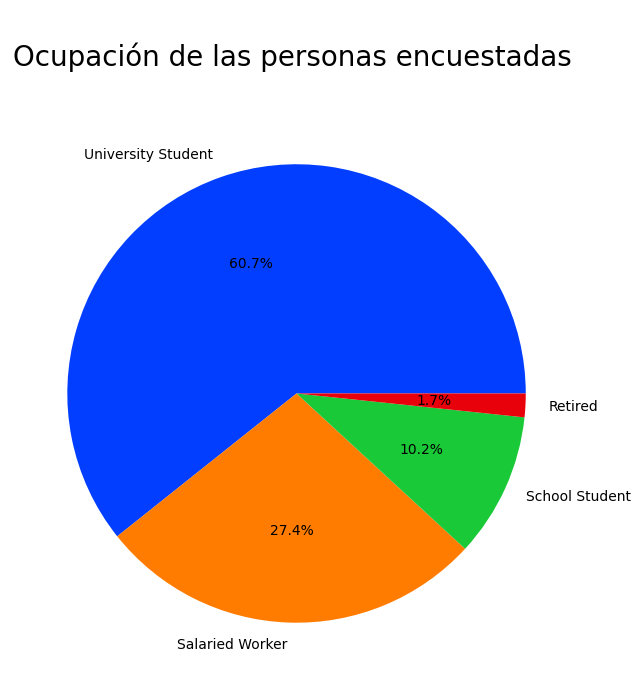

In [215]:
idx_salaried = df_1_esp["Ocupación"].value_counts().index.get_loc("Salaried Worker")
idx_student = df_1_esp["Ocupación"].value_counts().index.get_loc("School Student")


palette[idx_salaried], palette[idx_student] = palette[idx_student], palette[idx_salaried]

plt.figure(figsize=(8, 7))
plt.pie(df_1_esp["Ocupación"].value_counts(), labels=df_1_esp["Ocupación"].value_counts().index, autopct='%1.1f%%', colors=palette)

plt.title("\nOcupación de las personas encuestadas \n", fontsize=20, ha='center')
plt.tight_layout()
plt.show()

In [216]:
df_1_esp["Grupos_edad"].value_counts()

Grupos_edad
Jóvenes de 19-25    313
Jóvenes de 26-35     68
Adultos de 36-50     57
menores 18 años      32
Adultos > 50         11
Name: count, dtype: int64

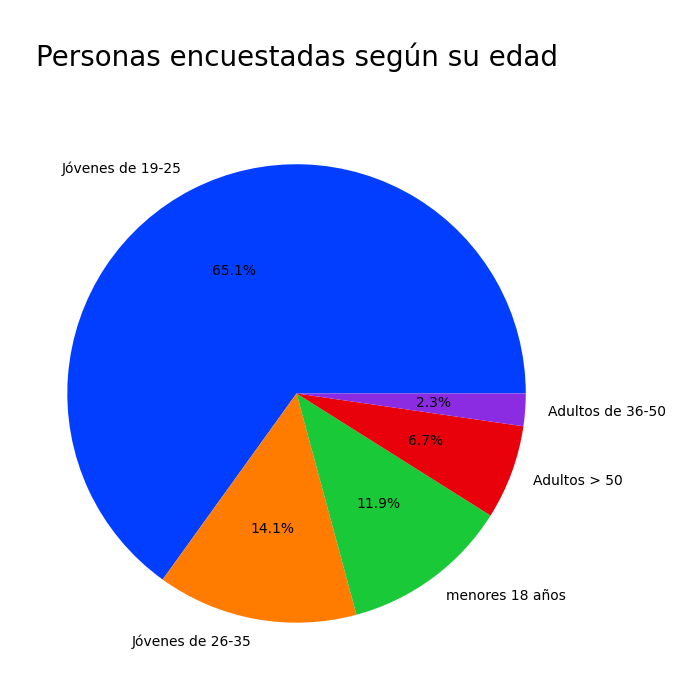

In [217]:
plt.figure(figsize=(8, 7))
plt.pie(df_1_esp["Grupos_edad"].value_counts(), labels=df_1_esp["Grupos_edad"].unique(), autopct='%1.1f%%', colors=palette)
plt.title("\nPersonas encuestadas según su edad\n", fontsize=20, ha='center')
plt.tight_layout()
plt.show()

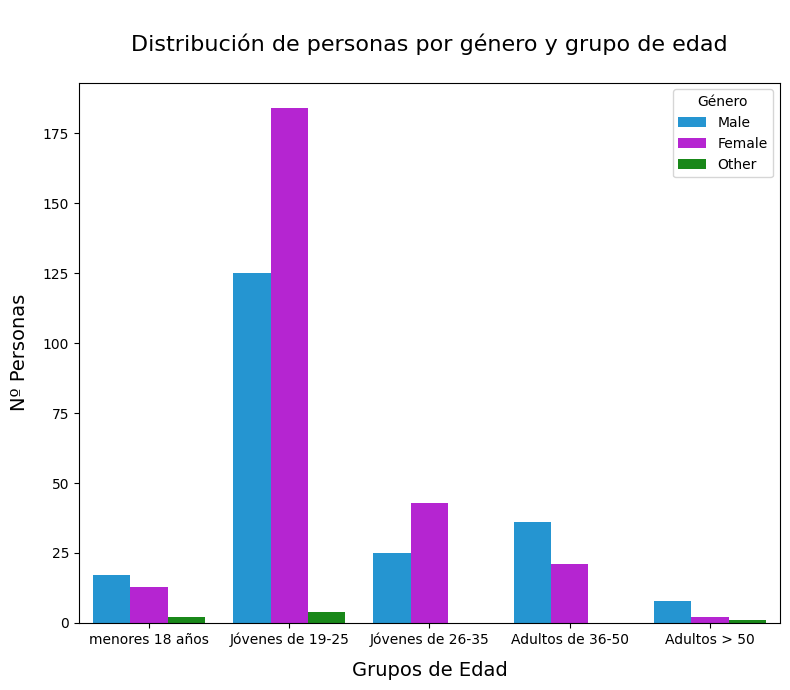

In [218]:

order = ["menores 18 años", "Jóvenes de 19-25", "Jóvenes de 26-35", "Adultos de 36-50", "Adultos > 50"]

df_1_esp["Grupos_edad"] = pd.Categorical(df_1_esp["Grupos_edad"], categories=order, ordered=True)


custom_palette = {"Other": "#069B06", "Female": "#C808EE", "Male": "#089EEE"}

plt.figure(figsize=(8,7))

sns.countplot(data=df_1_esp, x="Grupos_edad", hue="Género", palette=custom_palette)

plt.title("\nDistribución de personas por género y grupo de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14, labelpad=(10.0))
plt.ylabel("Nº Personas", fontsize=14, labelpad=(10.0))
plt.tight_layout()
plt.show()